In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

## 1. Prep dataset Flights

In [2]:
flights = sns.load_dataset("flights")

flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [3]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


### how can we convert year and month column into a datetime column and set it as index ?

#### step 1: construct a date string by combining the date elements columns

In [4]:

date_cols=["year","month"]
flights['date'] = flights[date_cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

flights.head(10)

,year,month,passengers,date
0,1949,Jan,112,1949-Jan
1,1949,Feb,118,1949-Feb
2,1949,Mar,132,1949-Mar
3,1949,Apr,129,1949-Apr
4,1949,May,121,1949-May
5,1949,Jun,135,1949-Jun
6,1949,Jul,148,1949-Jul
7,1949,Aug,148,1949-Aug
8,1949,Sep,136,1949-Sep
9,1949,Oct,119,1949-Oct


#### Step 2: parse the date string, format types [here] (https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)

In [5]:
flights['date'] = pd.to_datetime(flights['date'], format='%Y-%b') 

flights.head(10)

,year,month,passengers,date
0,1949,Jan,112,1949-01-01
1,1949,Feb,118,1949-02-01
2,1949,Mar,132,1949-03-01
3,1949,Apr,129,1949-04-01
4,1949,May,121,1949-05-01
5,1949,Jun,135,1949-06-01
6,1949,Jul,148,1949-07-01
7,1949,Aug,148,1949-08-01
8,1949,Sep,136,1949-09-01
9,1949,Oct,119,1949-10-01


#### Step 3: set the datetime column as index

In [6]:
flights.set_index('date', inplace=True, drop=True)

flights.head(10)

,year,month,passengers
date,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121
1949-06-01,1949,Jun,135
1949-07-01,1949,Jul,148
1949-08-01,1949,Aug,148
1949-09-01,1949,Sep,136


In [7]:
# optional: drop year and month columns

flights.drop(['year', 'month'], axis=1, inplace=True)

flights.head(10)

,passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


## 2. Plot data

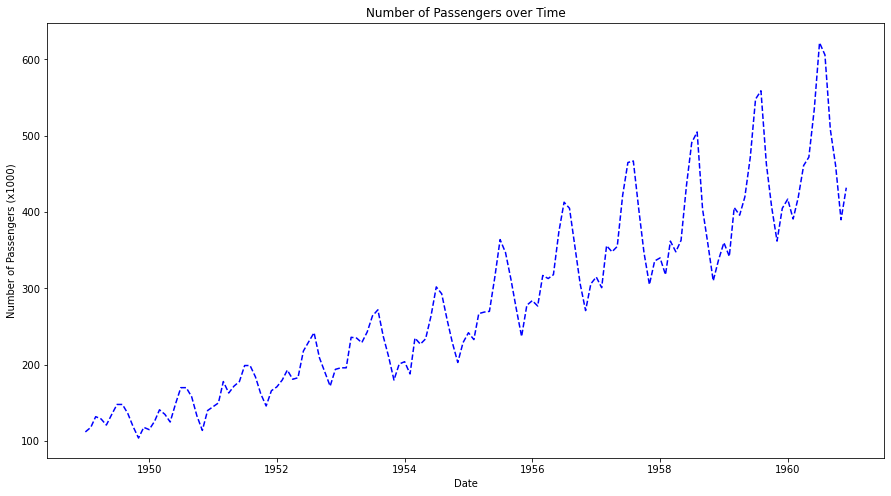

In [8]:
fig, ax = plt.subplots(figsize=(15,8))

ax.plot(flights.index, flights['passengers'], color='b', linestyle='--')

ax.set_xlabel('Date')
ax.set_ylabel('Number of Passengers (x1000)')
ax.set_title('Number of Passengers over Time')

plt.show()

## 3. Time Series Decomposition: Trend, Seasonality and Noise

A time series can be looked at as a process that can de decomposed into 3 systematic and 1 non-systematic components.
These components are:

- Level: The average value in the series.
- Trend: The increasing or decreasing value in the series.
- Seasonality: The repeating short-term cycle in the series.
- Noise: The random variation in the series.

That means that we can combine these components mathematically to reproduce/model the time series (all time series have at least a Level and Noise).

There are two types of time-series models, depending on the method of combining the components:

- Additive model: 	y(t) = Level + Trend + Seasonality + Noise
- Multipliative model: y(t) = Level + Trend + Seasonality + Noise


In [9]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


### 3.1 Trend

In [10]:
# we want to build a linear regression model for this data. Which features can we engineer ?

# What can we deduce from just observing the data plot ?? What does the number of passengers at any given date
# depend on ?

# time-step: this feature tells us the chronological order of every row/datapoint in my data set 

# Q: Why not month or year ??

flights['time_step'] = list(range(flights.shape[0]))

flights.head()

,passengers,time_step
date,,
1949-01-01,112,0
1949-02-01,118,1
1949-03-01,132,2
1949-04-01,129,3
1949-05-01,121,4


In [12]:
m_trend = LinearRegression()

X = flights[['time_step']]
y = flights['passengers']

m_trend.fit(X, y)

LinearRegression()

In [14]:
flights['trend_pred'] = m_trend.predict(X)

flights.head(10)

,passengers,time_step,trend_pred
date,,,
1949-01-01,112,0,90.309962
1949-02-01,118,1,92.967146
1949-03-01,132,2,95.624330
1949-04-01,129,3,98.281513
1949-05-01,121,4,100.938697
1949-06-01,135,5,103.595881
1949-07-01,148,6,106.253065
1949-08-01,148,7,108.910249
1949-09-01,136,8,111.567433


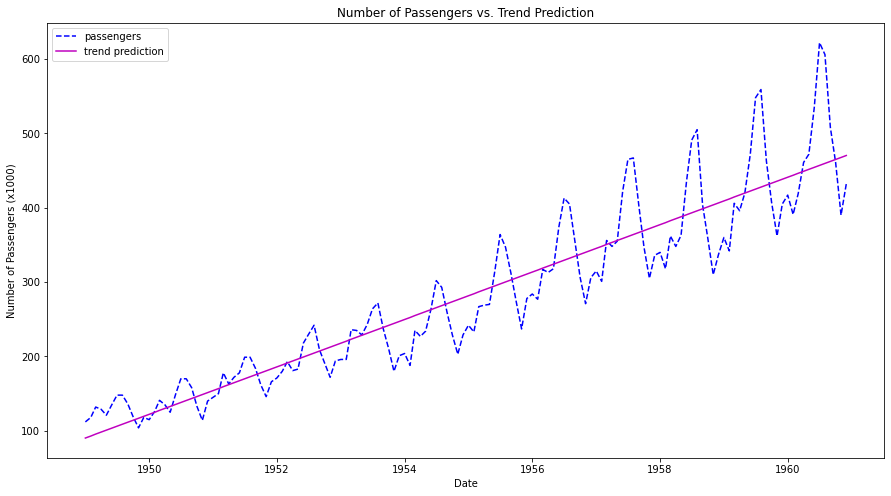

In [53]:
# plot passengers and trend prediction


fig, ax = plt.subplots(figsize=(15,8))

ax.plot(flights.index, flights['passengers'], color='b', linestyle='--', label='passengers')
ax.plot(flights.index, flights['trend_pred'], color='m', label='trend prediction')

ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Number of Passengers (x1000)')
ax.set_title('Number of Passengers vs. Trend Prediction')

plt.show()


### 3.2 Seasonality

In [28]:
# let's examine if the month seems to have an effect on the passengers number regradless the year 
# create a month feature

flights['month'] = flights.index.strftime("%b")

flights.head(10)

,passengers,time_step,trend_pred,month
date,,,,
1949-01-01,112,0,90.309962,Jan
1949-02-01,118,1,92.967146,Feb
1949-03-01,132,2,95.624330,Mar
1949-04-01,129,3,98.281513,Apr
1949-05-01,121,4,100.938697,May
1949-06-01,135,5,103.595881,Jun
1949-07-01,148,6,106.253065,Jul
1949-08-01,148,7,108.910249,Aug
1949-09-01,136,8,111.567433,Sep


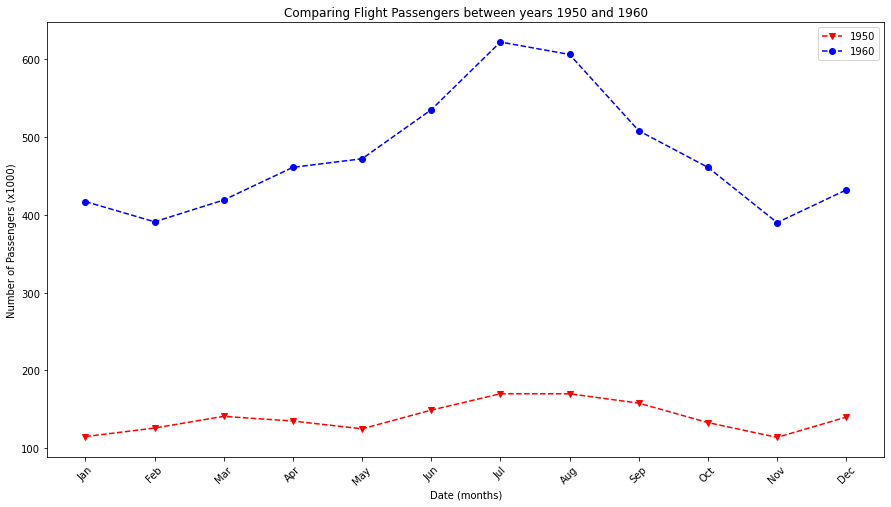

In [31]:
# let's examine if the month seems to have an effect on the passengers number regradless the year 

fig, ax = plt.subplots(figsize=(15,8))

flights_1950 = flights.loc['1950']
flights_1960 = flights.loc['1960']

ax.plot(flights_1950['month'], flights_1950['passengers'], color='r', linestyle='--', marker='v', label='1950')
ax.plot(flights_1960['month'], flights_1960['passengers'], color='b', linestyle='--', marker='o', label='1960')

ax.set_xlabel('Date (months)')
ax.set_ylabel('Number of Passengers (x1000)')
ax.set_title('Comparing Flight Passengers between years 1950 and 1960')
ax.legend()
plt.xticks(rotation=45)
plt.show()

In [34]:
# let's build a regression model based only on the month

X = pd.get_dummies(flights['month'])

X.head()

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
date,,,,,,,,,,,,
1949-01-01,0,0,0,0,1,0,0,0,0,0,0,0
1949-02-01,0,0,0,1,0,0,0,0,0,0,0,0
1949-03-01,0,0,0,0,0,0,0,1,0,0,0,0
1949-04-01,1,0,0,0,0,0,0,0,0,0,0,0
1949-05-01,0,0,0,0,0,0,0,0,1,0,0,0


In [35]:
m_season = LinearRegression()

m_season.fit(X, y)

flights['season_pred'] = m_season.predict(X)

flights.head()

,passengers,time_step,trend_pred,month,season_pred
date,,,,,
1949-01-01,112,0,90.309962,Jan,272.0
1949-02-01,118,1,92.967146,Feb,192.0
1949-03-01,132,2,95.624330,Mar,256.0
1949-04-01,129,3,98.281513,Apr,240.0
1949-05-01,121,4,100.938697,May,320.0


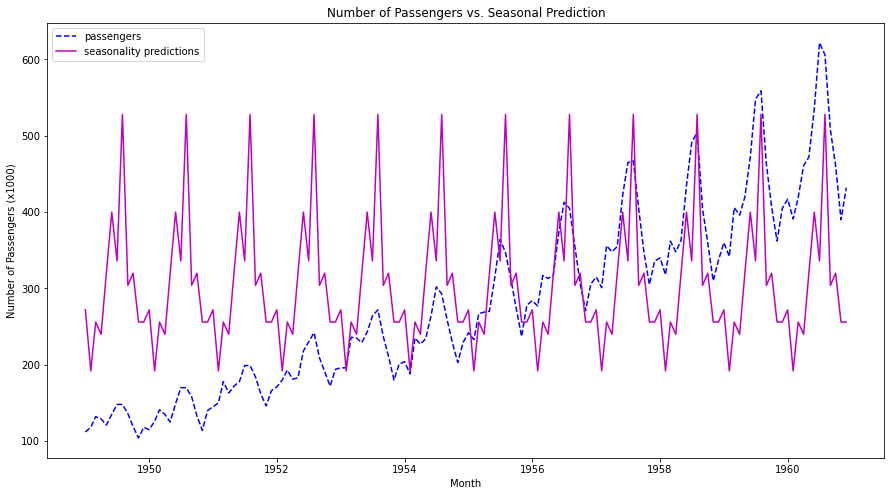

In [52]:
# plot passengers and seasonal prediction


fig, ax = plt.subplots(figsize=(15,8))

ax.plot(flights.index, flights['passengers'], color='b', linestyle='--', label='passengers')
ax.plot(flights.index, flights['season_pred'], color='m', label='seasonality predictions')

ax.legend()
ax.set_xlabel('Month')
ax.set_ylabel('Number of Passengers (x1000)')
ax.set_title('Number of Passengers vs. Seasonal Prediction')

plt.show()

### 3.3 Trend + Seasonality

In [42]:
# what is we combined both the time_step and month dummy encoded features in the model ? 
# Would we get better predictions ?

X = pd.get_dummies(flights[['time_step', 'month']], prefix='', prefix_sep='')
X.head()

,time_step,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
date,,,,,,,,,,,,,
1949-01-01,0,0,0,0,0,1,0,0,0,0,0,0,0
1949-02-01,1,0,0,0,1,0,0,0,0,0,0,0,0
1949-03-01,2,0,0,0,0,0,0,0,1,0,0,0,0
1949-04-01,3,1,0,0,0,0,0,0,0,0,0,0,0
1949-05-01,4,0,0,0,0,0,0,0,0,1,0,0,0


In [43]:
m_combined = LinearRegression()

m_combined.fit(X, y)

flights['combined_pred'] = m_combined.predict(X)

flights.head()

,passengers,time_step,trend_pred,month,season_pred,combined_pred
date,,,,,,
1949-01-01,112,0,90.309962,Jan,272.0,66.168269
1949-02-01,118,1,92.967146,Feb,192.0,59.418269
1949-03-01,132,2,95.624330,Mar,256.0,94.584936
1949-04-01,129,3,98.281513,Apr,240.0,91.501603
1949-05-01,121,4,100.938697,May,320.0,96.251603


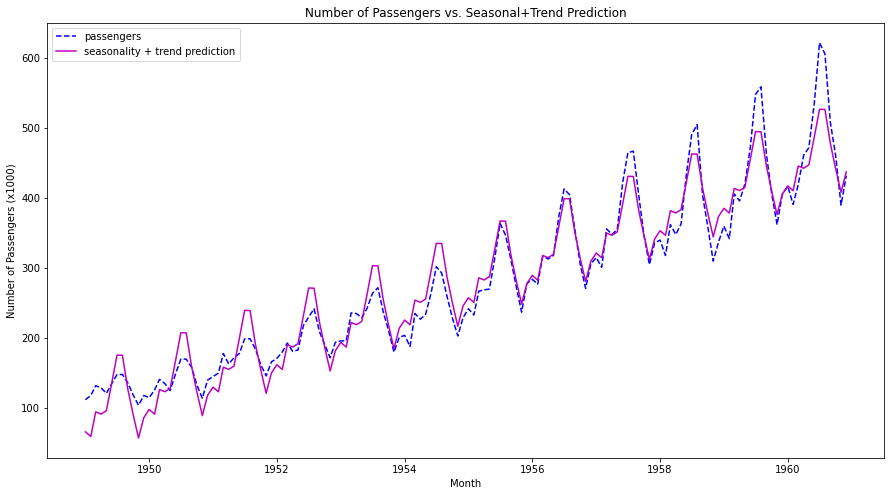

In [50]:
# plot passengers and seasonal+trend combined prediction


fig, ax = plt.subplots(figsize=(15,8))

ax.plot(flights.index, flights['passengers'], color='b', linestyle='--', label='passengers')
ax.plot(flights.index, flights['combined_pred'], color='m', label='seasonality + trend prediction')

ax.legend()
ax.set_xlabel('Month')
ax.set_ylabel('Number of Passengers (x1000)')
ax.set_title('Number of Passengers vs. Seasonal+Trend Prediction')

plt.show()

### 3.4 Remainder vs Noise

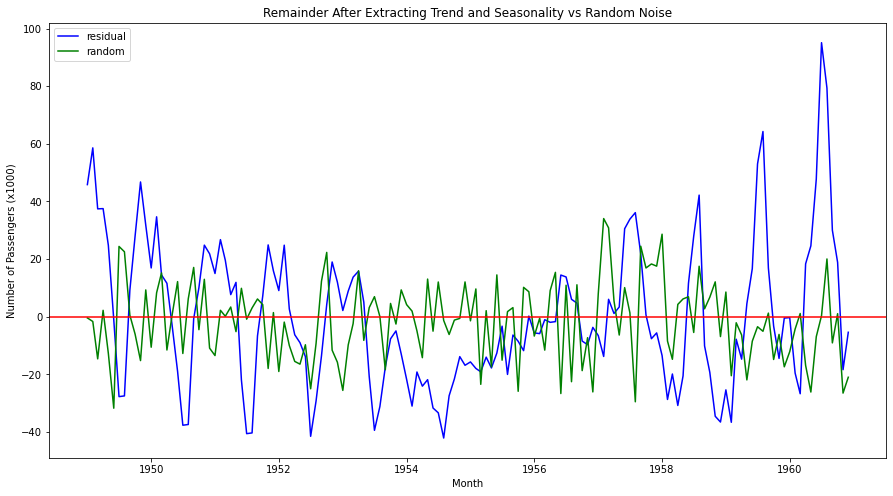

In [59]:
# plot the remainder of our model and compare to random noise


flights['remainder'] = flights['passengers'] - flights['combined_pred']
flights['random'] = np.random.normal(loc=0, scale=15, size=flights.shape[0])

fig, ax = plt.subplots(figsize=(15,8))

ax.plot(flights.index, flights['remainder'], color='b', label='residual')
ax.plot(flights.index, flights['random'], color='g', label='random')
ax.axhline(y=0, color='r')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Passengers (x1000)')
ax.set_title('Remainder After Extracting Trend and Seasonality vs Random Noise')
ax.legend()

plt.show()

In [62]:
flights[['remainder']]

,remainder
date,
1949-01-01,45.831731
1949-02-01,58.581731
1949-03-01,37.415064
1949-04-01,37.498397
1949-05-01,24.748397
...,...
1960-08-01,79.334936
1960-09-01,30.001603
1960-10-01,18.834936


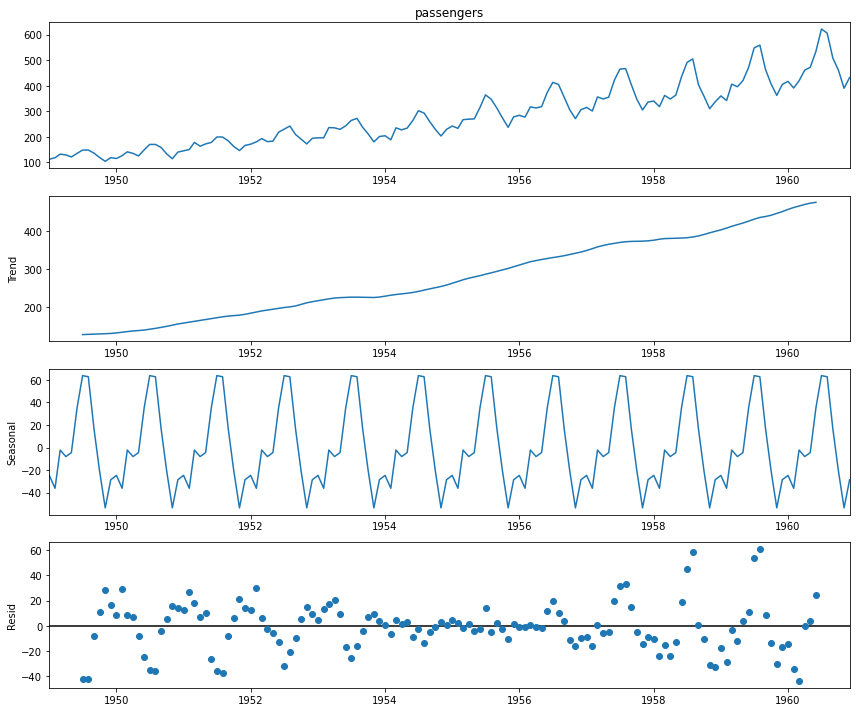

In [78]:
# quick way to check decomposition of a time series into trend and seeasonality from stats model

plt.rc("figure", figsize=(12,10))
from statsmodels.tsa.seasonal import seasonal_decompose

series = flights['passengers']
result = seasonal_decompose(series, model='additive')

result.plot();